<a href="https://colab.research.google.com/github/IKEDAKAZUKI/Qiskit-Tutorial/blob/main/Quantum_simulation_of_Schwinger_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum simulation of the Schwinger model by Kazuki Ikeda at Stony Brook University

I give a lecture on quantu simulation of the massive Schwinger model with topological term with IBM Qiskit.

More projects are provied in my [website](https://kazukiikeda.studio.site/)

More detailed research are provided in the following papers
1. K. Ikeda, D. Kharzeev, Y. Kikuchi, "Real-time dynamics of Chern-Simons fluctuations near a critical point
" [Phys. Rev. D 103, L071502](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.103.L071502)

2. A. Florio, D. Frenklakh, K. Ikeda, D. Kharzeev, V. Korepin, S. Shi, K. Yu, "Real-time non-perturbative dynamics of jet production: quantum entanglement and vacuum modification", [arXiv:2301.11991](https://arxiv.org/abs/2301.11991)

## Schwinger model

### Lagrangian
The Schwinger model is a 1+1 dimensional $U(1)$ gauge theory. It is widely recognized as a testbed for quantum simulations of high energy physics (QCD).

Here we provide the most general Lagrangian of the massive Schwinger model with the background electric field.

The Lagrangian density of the Schwinger model is given as 
\begin{equation}
    \mathcal{L} = -\frac{1}{4}F_{\mu\nu}F^{\mu\nu}+\bar{\psi}(i\gamma^\mu\partial_\mu-g\gamma^\mu A_\mu-m)\psi+\frac{g\theta}{4\pi}\epsilon^{\mu\nu}F_{\mu\nu}. 
\end{equation}
Therefore the action is 
$$S=\int d^2x\mathcal{L}.$$

We respectively denote the Pauli matrices as $X$, $Y$, and $Z$, and use the following gamma matrices $\gamma^0 = Z$, $\gamma^1 = i\,Y$, $\gamma^5=\gamma^0 \gamma^1 = X$. The phase diagram of the Schwinger model is as shown below.

![phase diagram](https://drive.google.com/uc?id=165_mlI7V8UK1srFyXUXikN6FWBmS4h1C)

### Lattice Hamiltonian
We work with the temporal gauge, $A_0=0$. From the action, the canonical momentum conjugate to $A_1$ can be read off as $\Pi = \dot{A}_1$. The corresponding Hamiltonian is then given by
\begin{align}
 H &= \int dx \left[\frac{1}{2}\Pi^2
 -\bar{\psi}(i \gamma^1D_1 -me^{i\gamma_5\theta})\psi\right],
\end{align}
with commutation relations $[A_1(x),\Pi(y)]=i\delta(x-y)$, and $\{\psi(x),\bar{\psi}(y)\}=\gamma_0\delta(x-y)$.

For quantum simulation, we discretize the space-time coordinate and work with the lattice Hamiltonian. 

We first convert a two-component Dirac fermion $\psi=(\psi^1,\psi^2)^T$ into to a staggered fermion
\begin{equation}
    \psi_1(x)\to\frac{\chi_{2n}}{\sqrt{a}},~\psi_2(x)\to\frac{\chi_{2n+1}}{\sqrt{a}},
\end{equation}
where $a$ is the finite lattice spacing. 

 The gauge fields are replaced by $e^{-iagA_1}\to U_n$ and $\Pi\to -gL_n$, that are placed on a link between $n$th and $(n+1)$st sites. The resulting lattice Hamiltonian is
\begin{align}
 H &= \frac{a g^2}{2}\sum_{n=1}^{N-1} L_n^2
 -\frac{i}{2a}\sum_{n=1}^{N-1}
 \big[\chi^\dagger_{n+1} U_n\chi_{n}-\chi^\dagger_{n}U_n^\dagger\chi_{n+1}\big]
 \nonumber\\
 &+ m\cos\theta\sum_{n=1}^{N} (-1)^n \chi^\dagger_n\chi_n
 \nonumber\\
 &+ i\frac{m\sin\theta}{2}\sum_{n=1}^{N-1} (-1)^n \big[\chi^\dagger_{n+1} U_n\chi_{n}-\chi^\dagger_{n}U_n^\dagger\chi_{n+1}\big],
\end{align}
with the Gauss law constraint:
\begin{equation}
L_{n+1}-L_n=\chi_n^\dagger\chi_n- \frac{1-(-1)^n}{2}. 
\end{equation}

### Spin Hamiltonian
For quantum simulation we translate the staggard fermions into Pauli matrices $X,Y,Z$.  This can be done by the Jordan-Wigner transformation
\begin{align}
\begin{aligned}
 \chi_n &=\frac{X_n-iY_n}{2}\prod_{j=1}^{n-1}(-i Z_j),\\
 \chi^\dagger_n &=\frac{X_n+iY_n}{2}\prod_{j=1}^{n-1}(i Z_j),
\end{aligned}
\end{align}
and we obtain the spin representation of the Hamiltonian
\begin{align}
\begin{aligned}
H=&\sum_{n=1}^{N-1}
    \left(\frac{1}{4a}-\frac{m}{4}(-1)^n\sin\theta\right)
    \left(X_n X_{n+1}+Y_n Y_{n+1}\right)\\
&+\sum_{n=1}^{N}\frac{m(-1)^n\cos\theta}{2} Z_n+\frac{ag^2}{2}\sum_{n=0}^{N}L^2_n.
\end{aligned}
\end{align}
With the boundary condition $L_0=0$, the Gauss' law constraint leads to the solution
\begin{align}
    L_n =  a\sum_{j=1}^n Q_j,
\end{align}
where $Q_j$ is the local vector charge
\begin{align}
    Q_j = \bar{\psi}\gamma^0\psi = \frac{Z_j+(-1)^j}{2a}.
\end{align}

## Quantum simulation of the Schwinger model

We will address  
- Implementation of the Hamltonian
- Static case: a simple time-evolution of the initial state.  
- Adiabatic state preparation of the ground state of the Schwinger model.
- Demonstration of phase transition by gradually changing the $\theta$-term.   

# Install Qiskit and packages

If Qiskit is not installed, please install it.

In [25]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import numpy as np
import matplotlib.pyplot as plt 
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit import QuantumCircuit, QuantumRegister, transpile, execute, Aer, BasicAer
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import partial_trace, entropy
import qiskit.quantum_info as qi

We first get the simulator.

In [27]:
simulator = Aer.get_backend('qasm_simulator')

# Basic operators and notations

In what follows, we explain basic operators, measurement, Bell states, reduced dencity matrices, the entanglement entropy. 

You can learn how to execute circuits using "qasm_simulator" and state vector simulator "aer_simulator_statevector". 

- Computational basis
$Z|0\rangle=+|0\rangle, Z|1\rangle=-|1\rangle$
$$ |0\rangle=\begin{pmatrix}1\\0\end{pmatrix},\quad|1\rangle=\begin{pmatrix}0\\1\end{pmatrix} $$

- $X$-basis
$X|+\rangle=+|+\rangle, X|-\rangle=-|-\rangle$
$$ |+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle),|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle), $$

- 1-qubit operators 
$$X=\begin{pmatrix}0&1\\1&0\end{pmatrix},\quad Y=\begin{pmatrix}0&-i\\i&0\end{pmatrix},\quad Z=\begin{pmatrix}1&0\\0&-1\end{pmatrix}$$

- 2-qubit operator 
$\text{CNOT}=|0\rangle\langle0|\otimes I+|1\rangle\langle1|\otimes X$. 

The gate set $\{X,Y,Z,CNOT\}$ is a universal gate set; any unitary operator can be approximated by those operators.

Other useful operators
- Hadamard gate $H=\frac{1}{\sqrt{2}}\begin{pmatrix}1&1\\1&-1\end{pmatrix}$
- Rotation gates $e^{-i\alpha X/2},e^{-i\alpha Y/2},e^{-i\alpha Z/2}$

The Initial state of the default qubit is $|0\rangle$. This can be conformed by the following circuit and measurment. 

# Implementing the massive Schwinger model (Static Hamiltonian)

In what follows we demonstrate quantum simulation of the massive Schwinger model
We first consider time-evolution with the **static Hamiltonian**. 

You can learn implementation of a time-ordered integral, Suzuki-Trotter decomposition, dynamics after a quench, computation of magnetization.  
 

As we explained previously, our Hamiltonian is 
\begin{align}
\begin{aligned}
H=&\sum_{n=1}^{N-1}
    \left(\frac{1}{4a}-\frac{m}{4}(-1)^n\sin\theta\right)
    \left(X_n X_{n+1}+Y_n Y_{n+1}\right)\\
&+\sum_{n=1}^{N}\frac{m(-1)^{n}\cos\theta}{2} Z_n+\frac{ag^2}{2}\sum_{n=1}^{N}L^2_n
\end{aligned}
\end{align}
where 
\begin{align}
    L_n& =  a\sum_{j=1}^n Q_j,\\
    Q_n& = \bar{\psi}\gamma^0\psi = \frac{Z_n+(-1)^n}{2a}.
\end{align}


We use $|0101\cdots01\rangle$ as the initial satte, which is the ground state of the model at the large mass limit $m\to\infty$ when $\theta=0$.

We consider time evolution of the chiral condensate $\frac{1}{N}\sum_{n=1}^{N}\bar{\psi}_n\psi_n=\frac{1}{2aN}\sum_{j=1}^{N}(-1)^jZ_{j}$
$$\frac{1}{N}\langle\bar{\psi}\psi(t)\rangle=\frac{1}{2aN}\langle01\cdots01|e^{i H t}\,\sum_{j=1}^{N}(-1)^jZ_{j}\, e^{-i H t}|01\cdots01\rangle.$$


The time-evolution of the initial state is given by the time-ordered integral
$$|g(t)\rangle=\mathcal{T}e^{-i\int_0^tHdt}|0\cdots0\rangle.$$
It is important that $Z$ and $X$ do not commute $[Z,X]\neq0$.


We approximate the time-volution by discritizing the time-step $\Delta t$ in the following way
$$|g(k\Delta t)\rangle=e^{-i\Delta t H_{XX}}e^{-i\Delta t H_{Z}}|g((k-1)\Delta t)\rangle.$$ 

This technique is called Suzuki-Trotter decomposition and $\Delta t$ is called a Suzuki-Trotter step. 

# Implementation of the Hamiltonian

We decompose the Hamiltonian into $H_{XX+YY}$, $H_{ZZ},H_{Z}$ as
\begin{align}
\begin{aligned}
H=&H_{XX+YY}+H_{ZZ}+H_Z\\
H_{XX+YY}=&\sum_{n=1}^{N-1}
    \left(\frac{1}{4a}-\frac{m}{4}(-1)^n\sin\theta\right)
    \left(X_n X_{n+1}+Y_n Y_{n+1}\right)\\
H_{ZZ}+H_Z&=\sum_{n=1}^{N}\frac{m(-1)^{n}\cos\theta}{2} Z_n+\frac{ag^2}{2}\sum_{n=1}^{N}L^2_n
\end{aligned}
\end{align}
where $H_{ZZ}$ consists of all $ZZ$-interaction terms and $H_{Z}$ consists of $Z$-terms only.  

### time-evolution using the $H_{ZZ}$ and $H_Z$ terms
In general, $e^{i\alpha Z_jZ_k}$ can be implemened by the folowing gate 
$$e^{i\alpha Z_{j}Z_{k}}= CX_{jk}R_{Z,k}(2\alpha)CX_{jk},$$
where $CX_{jk}$ is the CNOT gate $$CX_{jk}=|0\rangle_j\langle0|\otimes I+|1\rangle_j\langle1|\otimes X_k$$
and $R_{Z,k}(2\alpha)=e^{i\alpha Z_k}$ is the rotation about the $z$-axis at $k$.  

Therefore we can implement the $H_{ZZ}$ term by 
$$e^{-iH_{ZZ}\Delta t}=\prod_{j=0}^{N-2}CX_{j,j+1}R_{Z,j+1 }(-2J\Delta t)CX_{j,j+1}.$$

Implementation of $H_Z$ is straightforward
$$e^{-iH_{Z}\Delta t}=\prod_{j=0}^{N-1}R_{Z,j }(-2h\Delta t).$$

For more on these circuits, see the [demonstration with the Ising model](https://colab.research.google.com/drive/1k6KG4TpeGeIlCvcJt0bV_8-DP13sgnR6?usp=share_link).

### Time-evolution using the $H_{XX+YY}$ term

Although $H_{XX+YY}$ can be decomposed into $H_{XX}$ and $H_{YY}$ separetely, it is more efficient to implement them as follows. Such a neaserst neightbor hopping term can be implemeted as follows. For simplicity we first put $\theta=0$.

In [30]:
n_site=2
qr = QuantumRegister(n_site)
cr = ClassicalRegister(n_site)

### make main quantum circuit
qc = QuantumCircuit(qr,cr)

###make measurement circuit
qc_meas = QuantumCircuit(qr,cr)
qc_meas.measure(qr,cr)

a=1

dt=0.1
###exp(-iH_{XX+YY}\Delta t)
for i in range(n_site-1):
        qc.cx(qr[i],qr[i+1])
        qc.h(qr[i])
        qc.cx(qr[i],qr[i+1])
        
        qc.rz((0.5/a)*dt, qr[i])
        qc.rz(-(0.5/a)*dt, qr[i+1])
           
        qc.cx(qr[i],qr[i+1])
        qc.h(qr[i])
        qc.cx(qr[i],qr[i+1])
qc.draw()

┌───┐      ┌──────────┐     ┌───┐     
q935_0: ──■──┤ H ├──■───┤ Rz(0.05) ├──■──┤ H ├──■──
        ┌─┴─┐└───┘┌─┴─┐┌┴──────────┤┌─┴─┐└───┘┌─┴─┐
q935_1: ┤ X ├─────┤ X ├┤ Rz(-0.05) ├┤ X ├─────┤ X ├
        └───┘     └───┘└───────────┘└───┘     └───┘
 c10: 2/═══════════════════════════════════════════

### Prepare the initial state

We prepare the initial state $|0101\cdots01\rangle$ as follows. 

In [28]:
### parameters
n_site = 4

### simulator and shots
simulator = Aer.get_backend('qasm_simulator')

### quantum registers
qr = QuantumRegister(n_site)
cr = ClassicalRegister(n_site)

### make main quantum circuit
qc = QuantumCircuit(qr,cr)

for i in range(int(n_site/2)):
  qc.x(qr[2*i])

qc.draw()

┌───┐
q928_0: ┤ X ├
        └───┘
q928_1: ─────
        ┌───┐
q928_2: ┤ X ├
        └───┘
q928_3: ─────
             
  c8: 4/═════

### Measurement of the chiral condensate

We measure $Z_j~(j=1,\cdots,N)$ and obtain the bitstring $b=b_1\cdots b_{N}$, where each $b_j$ is either 0 or 1. 

$b_j=0$ means that +1 eigenvalue of $Z_j$ is obtained and $b_j=1$ means that -1 eigenvalue of $Z_j$ is obtained. 

To compute $\frac{1}{N}\langle\bar{\psi}\psi(t)\rangle=\frac{1}{2aN}\langle\psi(t)|\sum_{j=1}^{N}(-1)^jZ_j|\psi_t\rangle$, we conbert the bitstrings as follows 
\begin{align}
\frac{1}{N}\langle\bar{\psi}\psi(t)\rangle&=\frac{1}{2aN}\langle g(t)|\sum_{j=1}^{N}(-1)^jZ_{j}|g(t)\rangle
\\
&= 
\frac{1}{2aN}\sum_{j=1}^{N}\sum_{b_{1},\dots,b_{N}}(-1)^{j}(-)^{b_{j}}|\langle b_{1}\cdots b_{2aN}|\psi(t)\rangle|^{2}\\
&=\frac{1}{2aN}\sum_{b_{1},\dots,b_{N}}\sum_{j=1}^{N}(-1)^{j}(-1)^{b_{j}} \frac{\text{count}(b_{1}\cdots b_{N})}{n_{\text{shots}}}.
\end{align}
where count($b_{1}\cdots b_{N}$) counts the number of times a bitstring $b_{1}\cdots b_{N}\in\{0,1\}^N$ apperes.  

In [34]:
### parameters
n_site = 4
a = 1
M=1
g=1

J = 0.5*g*g*a

t_max = 3
step_max = 20*t_max

dt = t_max/step_max

### simulator and shots
simulator = Aer.get_backend('qasm_simulator')

### quantum registers
qr = QuantumRegister(n_site)
cr = ClassicalRegister(n_site)

### make main quantum circuit
qc = QuantumCircuit(qr,cr)


#######Prepapre Initial State#######
from qiskit.quantum_info import random_statevector
from qiskit.tools.monitor import job_monitor


###make measurement circuit
qc_meas = QuantumCircuit(qr,cr)
#for q in qr:
#    qc_meas.h(q)
qc_meas.measure(qr,cr)

time_list=[]
cc_list=[]
error_list=[]



job_counter=0
n_shots = 10000

## prepare the initial state
for i in range(int(n_site/2)):
  qc.x(qr[2*i])

for step in range(1,step_max+1):
    ###edit here###
 
    
    #acting gates to implement one Suzuki-Trotter step
    ###exp(-iH_{XX+YY}\Delta t) #even
    for i in range(n_site-1):
        qc.cx(qr[i],qr[i+1])
        qc.h(qr[i])
        qc.cx(qr[i],qr[i+1])
        
        qc.rz((0.5/a)*dt, qr[i])
        qc.rz(-(0.5/a)*dt, qr[i+1])
           
        qc.cx(qr[i],qr[i+1])
        qc.h(qr[i])
        qc.cx(qr[i],qr[i+1])
    
    ###exp(-iH_{Z}\Delta t)   mass
    for i in range(n_site):
        qc.rz(M*((-1)**(i+1))*dt,qr[i])
        

    ###exp(-iH_{ZZ}\Delta t)  Electric Field
    for i in range(1,n_site-1):
        for k in range(0,i):
            for l in range(k+1,i+1):
                qc.rzz(J*dt,qr[k],qr[l])  


        ###exp(-iH_{Z}\Delta t)  Electric Field
    for n in range(n_site-1):
        qc.rz(-0.5*J*dt*(n_site-(n+1)-0.5*(-1+(-1)**(n+1))),qr[n])
    

    #add main circuit to measurement circuit to have total circuit
    qc_total = qc.compose(qc_meas)  

    #execute circuit
    job = execute(qc_total, simulator, shots=n_shots) #execute Simulator 
    print('About to run job')   

    job.status()
    job_monitor(job)
    job_counter+=1
    print("Processed",job_counter, "jobs:",100*job_counter/step_max,"% has been done")
    print("Time is",dt*step)

    result = job.result() # obtain results
    counts = result.get_counts(qc_total) 
    
    #compute chiral condensate
    cc = 0
    
    se=0 #standard error
    
    error=[]
    for bit_string, count in counts.items():

        obs = 0
        for j in range(n_site):
            obs +=(-1)**int(bit_string[j])*(-1)**(j+1)
        cc += obs*count/n_shots/(2*a)/n_site
        
        for i in range(count):
            error.append(obs/(2*a))
        
  
    se=np.std(error)
        


    time_list.append(dt*step) #append time to the list of time
    cc_list.append(cc)
    error_list.append(se)
        



About to run job
Job Status: job has successfully run
Processed 1 jobs: 1.6666666666666667 % has been done
Time is 0.05
About to run job
Job Status: job has successfully run
Processed 2 jobs: 3.3333333333333335 % has been done
Time is 0.1
About to run job
Job Status: job has successfully run
Processed 3 jobs: 5.0 % has been done
Time is 0.15000000000000002
About to run job
Job Status: job has successfully run
Processed 4 jobs: 6.666666666666667 % has been done
Time is 0.2
About to run job
Job Status: job has successfully run
Processed 5 jobs: 8.333333333333334 % has been done
Time is 0.25
About to run job
Job Status: job has successfully run
Processed 6 jobs: 10.0 % has been done
Time is 0.30000000000000004
About to run job
Job Status: job has successfully run
Processed 7 jobs: 11.666666666666666 % has been done
Time is 0.35000000000000003
About to run job
Job Status: job has successfully run
Processed 8 jobs: 13.333333333333334 % has been done
Time is 0.4
About to run job
Job Status: 

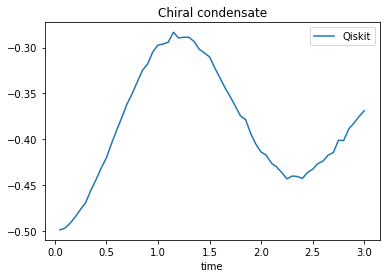

In [35]:
plt.plot(time_list, cc_list,label='Qiskit')
plt.title('Chiral condensate')
plt.xlabel('time')
plt.legend()
plt.show()

# Adiabatic state preparation (Time-dependent case)

Now we consider a **time-dependent case**, where the Hamiltonian is time-dependent. 

The massive Schwinger model is not analitically solvable. That means it is not possible to prepare the ground state by exact diagonalization, if the system is very large. 

The technique we introduce here works for a such a case. We start with a known ground state of a Hamiltonian $H_0$ and gradually evolves it into the desired ground state

$$H(t)=tH_1+(1-t)H_0.$$

This is exactly what we demonstrate with the [Ising model](https://colab.research.google.com/drive/1AV07pmU-QoiAzxyRNY56Y4TsJvKNP7lg?usp=share_link) and it is applied to various optimization problems. 

For practical appliactions to optimization problems using D-wave quantum annealer, please see 
- K. Ikeda, Y. Nakamura, T. Humble, 
[Application of Quantum Annealing to Nurse Scheduling Problem](https://www.nature.com/articles/s41598-019-49172-3), which is recorded in [D-wave user handbook](https://docs.dwavesys.com/docs/latest/handbook_problems.html). The code is available [here](https://github.com/dwave-examples/nurse-scheduling).

For more on the adiabatic state preparation, see Appendix in

- K. Ikeda, [Criticality of quantum energy teleportation at phase transition points in quantum field theory](https://arxiv.org/abs/2301.11712), arXiv: 2301.11712

In our case the most efficient choice of $H(t=0)$ is the mass term $H_m=\frac{m}{2}\sum_{j=1}^N(-1)^jZ_j$, since its ground state is the Neel state $|0101\cdots01\rangle,~(m>0)$. With this choice, our time-depedent Hamiltonian is  
$$
H(t)=tH_{XX+YY}+tH_{ZZ}+tH_Z+H_{m},~t\in[0,1]
$$
where $H_Z$ is consists of mass independent $Z$-terms 

- The initial state is $|10\cdots10\rangle$, which is the ground state of $H_Z(m)~(m>0)$. 

- The system gradually evolves from $H_Z(m)$ to the full hamiltonian $H$. 

### Implement time-dependent Hamiltonian

Let us consider about computing the average chiral condensate $\frac{1}{N}\langle\bar{\psi}\psi(m)\rangle$ of the Schwinger model with arbitrary mass $m$. 

The initial chiral condensate is $-\frac{1}{2a}$, since we use $|01\cdots01\rangle$ and the initial Hamiltonian is $H(t=0,m)=H_m$. 
Again we use $\theta=0$ for simplicity.

In [39]:
### parameters
n_site = 8
a = 1
M=3
g=1

J = 0.5*g*g*a

t_max = 1
step_max = 20*t_max

dt = t_max/step_max

### simulator and shots
simulator = Aer.get_backend('qasm_simulator')

### quantum registers
qr = QuantumRegister(n_site)
cr = ClassicalRegister(n_site)

### make main quantum circuit
qc = QuantumCircuit(qr,cr)


#######Prepapre Initial State#######
from qiskit.quantum_info import random_statevector
from qiskit.tools.monitor import job_monitor


###make measurement circuit
qc_meas = QuantumCircuit(qr,cr)
#for q in qr:
#    qc_meas.h(q)
qc_meas.measure(qr,cr)

time_list=[]
cc_list=[]
error_list=[]



job_counter=0
n_shots = 10000

## prepare the initial state
for i in range(int(n_site/2)):
  qc.x(qr[2*i])

for step in range(1,step_max+1):
    ###edit here###
 
    
    #acting gates to implement one Suzuki-Trotter step
    ###exp(-iH_{XX+YY}\Delta t) #even
    for i in range(n_site-1):
        qc.cx(qr[i],qr[i+1])
        qc.h(qr[i])
        qc.cx(qr[i],qr[i+1])
        
        qc.rz((0.5/a)*step*dt, qr[i])
        qc.rz(-(0.5/a)*step*dt, qr[i+1])
           
        qc.cx(qr[i],qr[i+1])
        qc.h(qr[i])
        qc.cx(qr[i],qr[i+1])
    
    ###exp(-iH_{Z}\Delta t)   mass
    for i in range(n_site):
        qc.rz(M*((-1)**(i+1))*dt,qr[i])
        

    ###exp(-iH_{ZZ}\Delta t)  Electric Field
    for i in range(1,n_site-1):
        for k in range(0,i):
            for l in range(k+1,i+1):
                qc.rzz(J*step*dt,qr[k],qr[l])  


        ###exp(-iH_{Z}\Delta t)  Electric Field
    for n in range(n_site-1):
        qc.rz(-0.5*J*step*dt*(n_site-(n+1)-0.5*(-1+(-1)**(n+1))),qr[n])
    

    #add main circuit to measurement circuit to have total circuit
    qc_total = qc.compose(qc_meas)  

    #execute circuit
    job = execute(qc_total, simulator, shots=n_shots) #execute Simulator 
    print('About to run job')   

    job.status()
    job_monitor(job)
    job_counter+=1
    print("Processed",job_counter, "jobs:",100*job_counter/step_max,"% has been done")
    print("Time is",dt*step)

    result = job.result() # obtain results
    counts = result.get_counts(qc_total) 
        #compute chiral condensate
    cc = 0
    
    se=0 #standard error
    
    error=[]
    for bit_string, count in counts.items():

        obs = 0
        for j in range(n_site):
            obs +=(-1)**int(bit_string[j])*(-1)**(j+1)
        cc += obs*count/n_shots/(2*a)/n_site
        
        for i in range(count):
            error.append(obs/(2*a))
        
  
    se=np.std(error)
        


    time_list.append(dt*step) #append time to the list of time
    cc_list.append(cc)
    error_list.append(se)
        


About to run job
Job Status: job has successfully run
Processed 1 jobs: 5.0 % has been done
Time is 0.05
About to run job
Job Status: job has successfully run
Processed 2 jobs: 10.0 % has been done
Time is 0.1
About to run job
Job Status: job has successfully run
Processed 3 jobs: 15.0 % has been done
Time is 0.15000000000000002
About to run job
Job Status: job has successfully run
Processed 4 jobs: 20.0 % has been done
Time is 0.2
About to run job
Job Status: job has successfully run
Processed 5 jobs: 25.0 % has been done
Time is 0.25
About to run job
Job Status: job has successfully run
Processed 6 jobs: 30.0 % has been done
Time is 0.30000000000000004
About to run job
Job Status: job has successfully run
Processed 7 jobs: 35.0 % has been done
Time is 0.35000000000000003
About to run job
Job Status: job has successfully run
Processed 8 jobs: 40.0 % has been done
Time is 0.4
About to run job
Job Status: job has successfully run
Processed 9 jobs: 45.0 % has been done
Time is 0.45
About

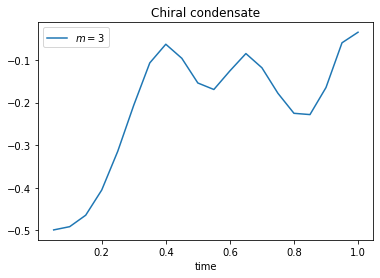

In [40]:
plt.plot(time_list, cc_list, "-",label=f'$m={M}$')
plt.title('Chiral condensate')
plt.xlabel('time')
plt.legend()
plt.show()

# Simulation of phase transition

Now we demonstarete interesting physics of the massive Schwinger model. 
Remember the phase diagram. 

![phase diagram](https://drive.google.com/uc?id=165_mlI7V8UK1srFyXUXikN6FWBmS4h1C)


Using the previous data of the adiabatic state preparation, we can demonstrate the phase transition.

Our time-dependent Hamiltonian is 
\begin{align}
\begin{aligned}
H(t)=&\sum_{n=1}^{N-1}
    \left(\frac{1}{4a}-\frac{m}{4}(-1)^n\sin(2\pi t)\right)
    \left(X_n X_{n+1}+Y_n Y_{n+1}\right)\\
&+\sum_{n=1}^{N}\frac{m(-1)^n\cos(2\pi t)}{2} Z_n+\frac{ag^2}{2}\sum_{n=0}^{N}L^2_n.
\end{aligned}
\end{align}

We should still keep the ground state of the Hamiltonian at $m$, if we did not destroy the circuit above. (Please execute adiabatic state preparation now if you have not done yet.)

Now let us gradually change the $\theta$-term from 0 to $2\pi$. Then according to the phase diagram, there should be a (first-order or second-order) phase transition at $\theta=\pi$. 

In [41]:
t_max = 1
step_max = 20*t_max

dt = t_max/step_max


time_list2=[]
cc_list2=[]
error_list2=[]


for step in range(1,step_max+1):
    ###edit here###
 
    
    #acting gates to implement one Suzuki-Trotter step
    ###exp(-iH_{XX+YY}\Delta t) #even
    for i in range(n_site-1):
        qc.cx(qr[i],qr[i+1])
        qc.h(qr[i])
        qc.cx(qr[i],qr[i+1])
        
        qc.rz(0.5*((0.5/a)-0.5*np.sin(2*np.pi*step)*M*(-1)**(i+1))*dt, qr[i])
        qc.rz(-0.5*((0.5/a)-0.5*np.sin(2*np.pi*step)*M*(-1)**(i+1))*dt, qr[i+1])
           
        qc.cx(qr[i],qr[i+1])
        qc.h(qr[i])
        qc.cx(qr[i],qr[i+1])
    
    ###exp(-iH_{Z}\Delta t)   mass
    for i in range(n_site):
        qc.rz(M*((-1)**(i+1))*np.cos(2*step*np.pi)*dt,qr[i])
        
        
    ###exp(-iH_{ZZ}\Delta t)  Electric Field
        
    for i in range(1,n_site-1):
        for k in range(0,i):
            for l in range(k+1,i+1):
                qc.rzz(J*dt,qr[k],qr[l])  
    
        ###exp(-iH_{Z}\Delta t)  Electric Field
    for n in range(n_site-1):
        qc.rz(-0.5*J*dt*(n_site-(n+1)-0.5*(-1+(-1)**(n+1))),qr[n])
        
            
    for i in range(n_site-1):
        qc.cx(qr[i],qr[i+1])
        qc.h(qr[i])
        qc.cx(qr[i],qr[i+1])
        
        qc.rz(0.5*((0.5/a)-0.5*np.sin(2*np.pi*step)*M*(-1)**(i+1))*dt, qr[i])
        qc.rz(-0.5*((0.5/a)-0.5*np.sin(2*np.pi*step)*M*(-1)**(i+1))*dt, qr[i+1])
           
        qc.cx(qr[i],qr[i+1])
        qc.h(qr[i])
        qc.cx(qr[i],qr[i+1])
        
    

    #add main circuit to measurement circuit to have total circuit
    qc_total = qc.compose(qc_meas)  

    #execute circuit
    job = execute(qc_total, simulator, shots=n_shots) #execute Simulator 
    print('About to run job')   

    job.status()
    job_monitor(job)
    job_counter+=1
    print("Processed",job_counter, "jobs:",100*job_counter/step_max,"% has been done")
    print("Time is",dt*step)

    result = job.result() # obtain results
    counts = result.get_counts(qc_total) 
        #compute magnetization
    cc = 0
    
    se=0 #standard error
    
    error=[]
    for bit_string, count in counts.items():

        obs = 0
        for j in range(n_site):
            obs +=(-1)**int(bit_string[j])*(-1)**(j+1)
        cc += obs*count/n_shots/(2*a)/n_site
        
        for i in range(count):
            error.append(obs/(2*a))
        
  
    se=np.std(error)
        


    time_list2.append(dt*step) #append time to the list of time
    cc_list2.append(cc)
    error_list2.append(se)

About to run job
Job Status: job has successfully run
Processed 21 jobs: 105.0 % has been done
Time is 0.05
About to run job
Job Status: job has successfully run
Processed 22 jobs: 110.0 % has been done
Time is 0.1
About to run job
Job Status: job has successfully run
Processed 23 jobs: 115.0 % has been done
Time is 0.15000000000000002
About to run job
Job Status: job has successfully run
Processed 24 jobs: 120.0 % has been done
Time is 0.2
About to run job
Job Status: job has successfully run
Processed 25 jobs: 125.0 % has been done
Time is 0.25
About to run job
Job Status: job has successfully run
Processed 26 jobs: 130.0 % has been done
Time is 0.30000000000000004
About to run job
Job Status: job has successfully run
Processed 27 jobs: 135.0 % has been done
Time is 0.35000000000000003
About to run job
Job Status: job has successfully run
Processed 28 jobs: 140.0 % has been done
Time is 0.4
About to run job
Job Status: job has successfully run
Processed 29 jobs: 145.0 % has been done

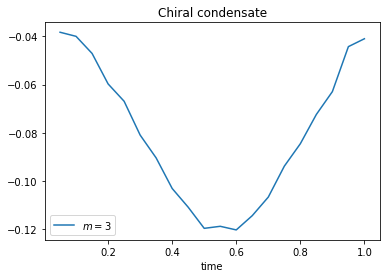

In [42]:
plt.plot(time_list2, cc_list2, "-",label=f'$m={M}$')
plt.title('Chiral condensate')
plt.xlabel("time")
plt.legend()
plt.show()

The peak around $t=0.5$ corresponds to the critical point of the phase transition. 